Prepared by Keyan Ahmadi

### Overview of what this project aims to solve

In order to have high volumes of market share in the financial sector, banks tend to issue large credits to their clients – some of which are unqualified to handle such a great volume of credit. Majority of clients, regardless of their payback power, spend their credit recklessly and start collecting large debts. This will result in a crisis which targets the consumer finance confidence. Therefore, creating a model to perform risk prediction that can forecast unqualified clients would be a great help to both the banks and the cardholders. Risk prediction (estimating the probability of default) is generally more insightful than putting clients into a binary bucket of risky or not risky. Therefore, this project goal is to develop a model that has the predicting power to classify if clients will default on their future payments to solve the consumer finance crisis.


The dataset used for this project is the "default of credit card clients" dataset which utilizes information from an important banks in Taiwan. The dataset contains 30,000 observations with mix clients that have and have not defaulted on their payments (Target Variable). Important features such as the given credit amount, education, age, history of past payment, etc., is provided within the dataset. 

In [122]:
# Importing Relevant Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler   
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score, recall_score,roc_auc_score,f1_score
from sklearn.feature_selection import RFE
import imblearn
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [123]:
# Importing the "default of credit card clients" dataset
df=pd.read_csv('default of credit card clients.csv')

In [124]:
# Printing the first 5 rows to see if the file is being read properly
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Detailed explanation of data:

The dataset "default of credit card clients" is comprised from payment data collected from a prestigious bank in Taiwan that issues currencies and credit-cards. The data, which was collected in October 2005, contains a diverse sample which includes different educational levels, marital status, a variety of different ages for both males and females. The dataset contains 30,000 observations, 23 features, and the target variable is the bank’s credit-card holders default pattern (1 being yes and 0 being no).

In [125]:
# Finding the shape of the dataframe
print("The Shape of the dataframe is:", df.shape)

The Shape of the dataframe is: (30000, 25)


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

### Exploratory Data Analysis (EDA):


- #### In the following section I display 6 meaningful graphs to better understand the underlying patterns in my data. 


- #### Before plotting any graphs, some entries for certain features were re-labeled for better visualization purposes. For example, in the "SEX" column, I relabel 1 to represent Male and 2 to represent Female.

In [127]:
#Dropping id column as it is useless
df.drop('ID',axis=1,inplace=True)

# Replacing the enteries -2 and 0 with -1 as all three entries represent the bank's client paying the bank statement in 
# accordance with the arrangement (no delay).
cols = ["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5", "PAY_6"]

for col in cols:
  df[col] = df[col].replace([0],-1)
  df[col] = df[col].replace([-2],-1)

# Replacing the enteries 0, 5, and 6 with 4 as all four entries represent the bank's client education level that entered "Other"
df["EDUCATION"] = df["EDUCATION"].replace([0,5,6],4)

#Labelling the data for making the graphs
df['SEX'] = df['SEX'].map({1: 'Male',2:'Female'})
df['MARRIAGE'] = df['MARRIAGE'].map({1: 'married',2:'single',3:'others'})

### Plot #1: Correlation Heatmap of the dataset's Features

Text(110.59375, 0.5, 'Features')

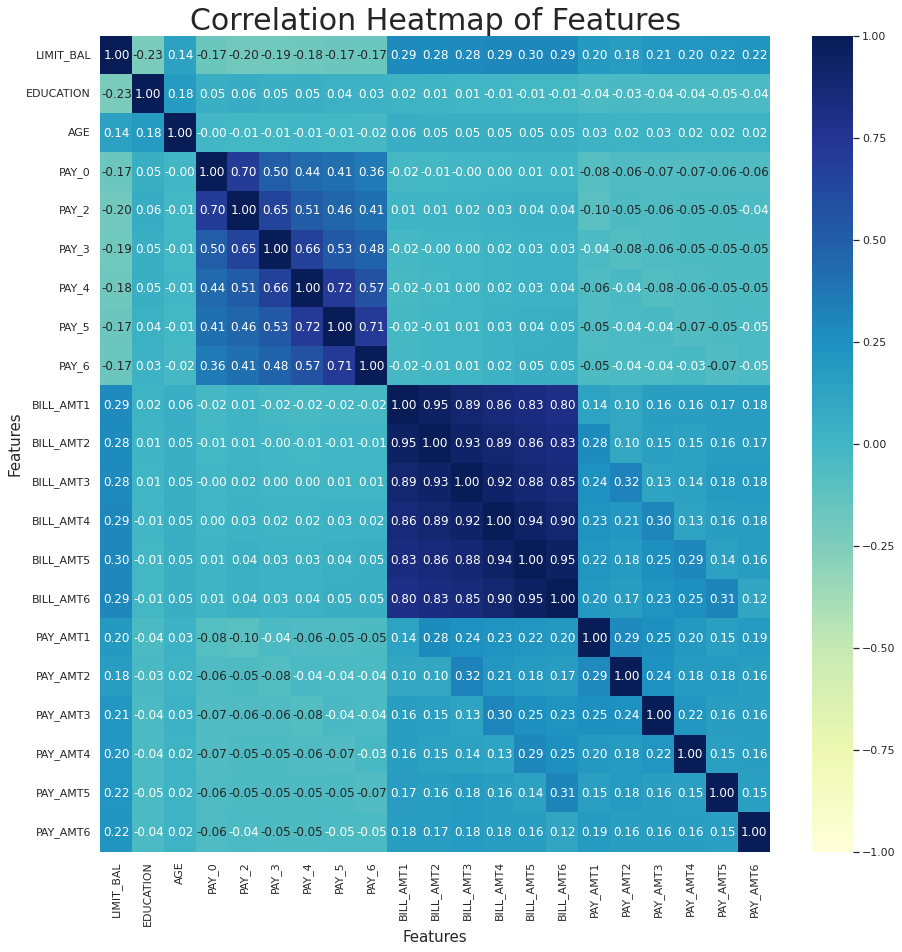

In [128]:
# Plot #1: Correlation Heatmap of the dataset's Features
df_heatmap = df.copy()
df_heatmap.drop('default payment next month',axis=1,inplace=True)

sns.set(rc={'figure.figsize':(15,15)}, font_scale = 1)
sns.heatmap(df_heatmap.corr(),annot=True,fmt='.2f', vmin=-1,vmax=1,cmap="YlGnBu")
plt.title('Correlation Heatmap of Features', fontsize=30)
plt.xlabel("Features",fontsize=15)
plt.ylabel("Features",fontsize=15)

I developed a Heatmap of my dataset to identify which features have high collinearity with one another. Features that have high correlation with one another provide redundant information to the model and only increase the model’s complexity and runtime. Therefore, to have an efficient model, it is vital to drop feature with high collinearity. Degrees of collinearity is defined as follow: 

- Values between ± 0.5 and ± 1.0 is considered to be highly correlated.
- Values between ± 0.3 and ± 0.49 is considered to have medium degree of correlation. 
- Values between 0 and ± 0.29 is considered to have low degrees of correlation. 

In my case, both the "BILL_AMT" and "PAY" features have high collinearity with features within their own group. This makes intuitive sense as the features in each category (BILL_AMT or PAY) represent the same information but for different months of the year. Therefore, only one feature in each group needs to be introduced to the model for training purposes. Having develop this Heatmap and understanding the relationship between each feature, I can better deploy data featuring techniques to clean the dataset in the upcoming sections. 


Reference:https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/pearsons-correlation-coefficient/

### Plot #2: Bar Plot of Feature Importance with respect to the Target Variable


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text major ticklabel objects>)

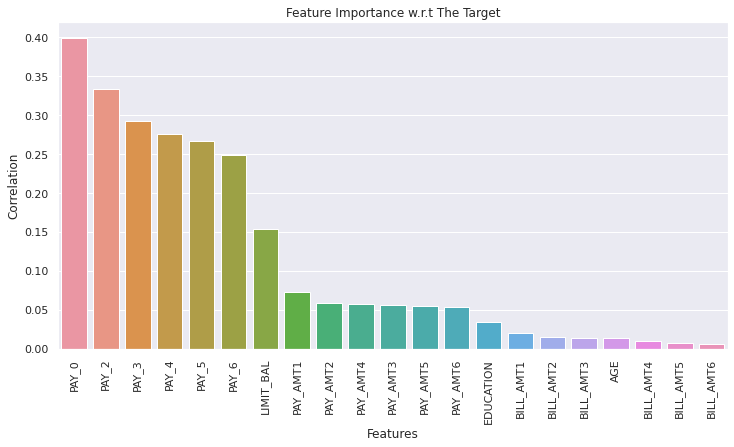

In [130]:
# Plot #2: Bar Plot of Feature Importance with respect to the Target Variable

cor_matrix = df.corr()
cor_features = cor_matrix.index
#Correlation with output variable
cor = abs(cor_matrix['default payment next month'])
cor=pd.DataFrame({'features':cor.index,'corr':cor.values})
cor=cor.sort_values(by='corr',ascending=False)
cor.reset_index(inplace=True,drop=True)

#Plotting the features
sns.set_theme(style='whitegrid')
sns.set(rc={'figure.figsize':(12,6)})
sns.barplot(x='features',y='corr',data=cor[1:]) #Excluding the target
plt.title('Feature Importance w.r.t The Target')
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks(rotation=90)

The above bar plot illustrates how each feature is related to the target variable ("default payment next month"). By observing the bar plot, I can identify which features are mostly correlated to the target variable. In my case, the feature which represents the past payment history of the bank’s clients (Pay_0 – Pay_6) has the highest correlation to the target variable.

### Plot #3: Box Plots for the Different Educational Level Default Distribution and Box Plot for Credit Application Distribution For Different Educational Levls


Text(1.5, 550000, 'Please Note Yes Represents Default And \n0 Represents Not Default')

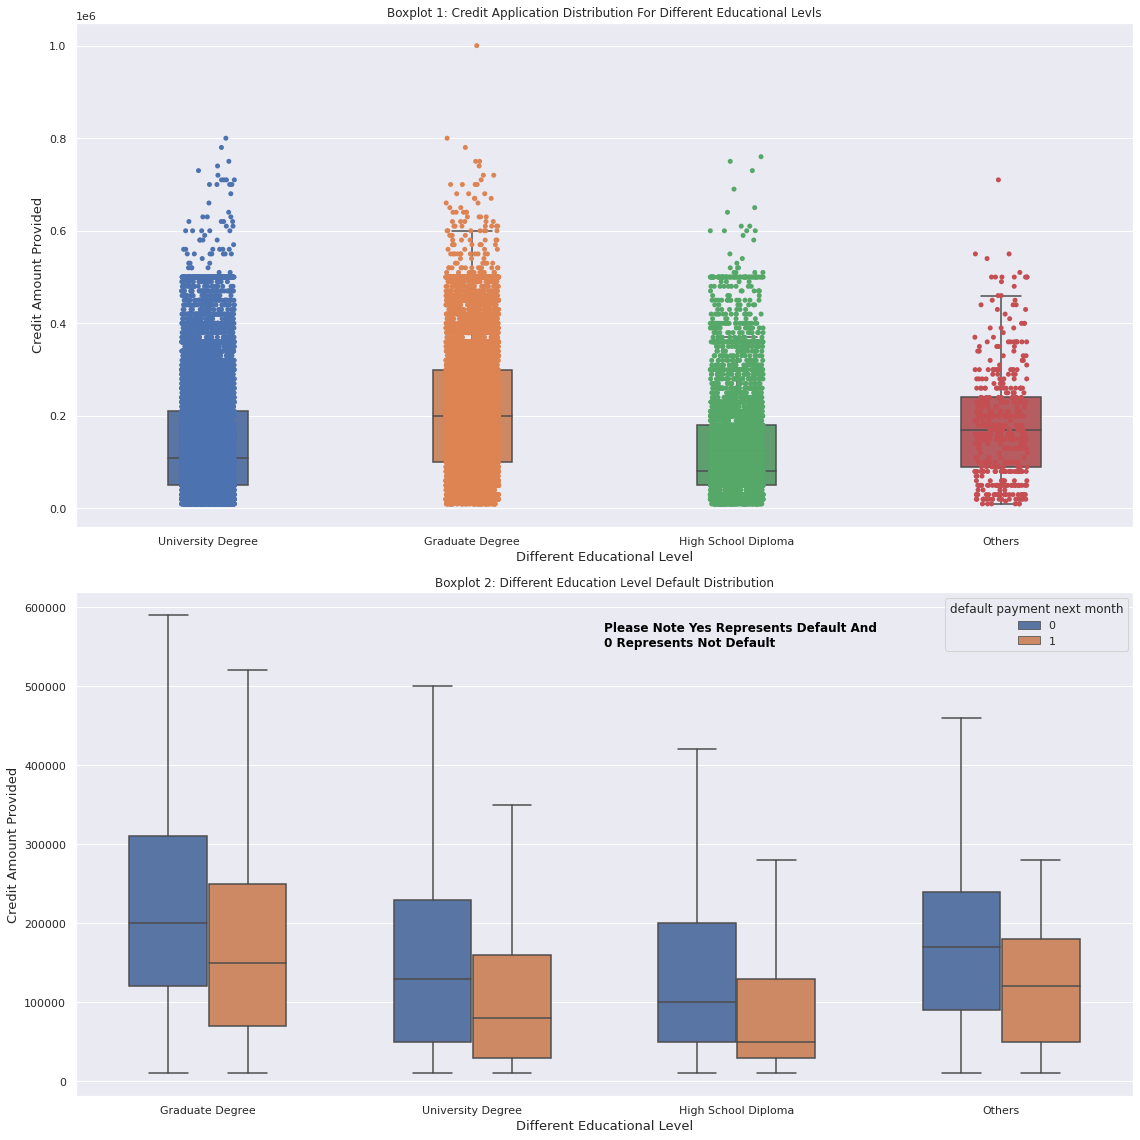

In [131]:
# Plot #3: Box Plots for the Different Educational Level Default Distribution and Box Plot for Credit Application Distribution 
#          For Different Educational Levls

df_edu_box = df.copy()
df_edu_box["EDUCATION"] = df_edu_box["EDUCATION"].replace([1],"Graduate Degree")
df_edu_box["EDUCATION"] = df_edu_box["EDUCATION"].replace([2],"University Degree")
df_edu_box["EDUCATION"] = df_edu_box["EDUCATION"].replace([3],"High School Diploma")
df_edu_box["EDUCATION"] = df_edu_box["EDUCATION"].replace([4],"Others")

sns.set(style="darkgrid")
fig, axes = plt.subplots(2, 1, figsize=(16, 16))
ax = sns.boxplot(x="EDUCATION", y="LIMIT_BAL", data=df_edu_box, showfliers = False, width=0.6, hue='default payment next month', ax=axes[1], order=["Graduate Degree", "University Degree", "High School Diploma", "Others"])
axes[1].set_title("Boxplot 2: Different Education Level Default Distribution")
ax.set_ylabel("Credit Amount Provided", fontsize = 13)
ax.set_xlabel("Different Educational Level", fontsize = 13)

ax1 = sns.boxplot(x="EDUCATION", y="LIMIT_BAL", data=df_edu_box, showfliers = False, width=0.3, ax=axes[0])
ax1 = sns.stripplot(x = "EDUCATION",y = "LIMIT_BAL", data = df_edu_box, ax=axes[0])
axes[0].set_title("Boxplot 1: Credit Application Distribution For Different Educational Levls")
ax1.set_ylabel("Credit Amount Provided", fontsize = 13)
ax1.set_xlabel("Different Educational Level", fontsize = 13)
plt.tight_layout()

plt.text(1.5, 550000, "Please Note Yes Represents Default And \n0 Represents Not Default", horizontalalignment='left', size='medium', color='black', weight='semibold')

By inspecting Boxplot 1, I can see that higher level degrees are generally associated with higher credit limit applications. This makes sense as a higher educational level (and other associated factors) would likely contribute to the ability to take out more credit. However, it is interesting to note that the median credit limit for university grads is not much higher than those with high school diplomas; there is a much greater jump in median from university degrees to graduate degrees. With regards to the “Other” category, while it has fewer applications in general and a lower volume of high credit limit applications, the respective quartiles are higher than both university degrees and high school diplomas, and the median is only slightly lower than the graduate degrees. As I don’t know for sure what makes up the “Others” category, it would be worthwhile for the bank to get a better understanding of this segment to ensure that this trend is to be expected. If “Other” includes individuals with a PhD, for example, then I would expect to see higher credit limit applications.

Looking at Boxplot 2 I would expect the non-default graph for a segment to be distributed higher along the y-axis when compared to the corresponding graph for defaults, as the bank’s methodology in issuing credit should favour applicants that will not default. This is the trend I observe in Boxplot 2. However, if I were to observe a segment in which the non-default graph was distributed lower along the y-axis than the corresponding default graph, then it would be prudent for the bank to re-examine its lending methodology and risk assessment practices.

In [132]:
# Please Note That "No" represents "not default" on payment and "Yes" represents "default" on payment
df['default payment next month']=df['default payment next month'].map({0:'No',1:'Yes'})

### Plot #4: Pie Charts for the SEX, EDUCATION, and MARRIAGE Features when Clients Defaulted on their payments. Pie charts illustrate the distribution of each of the mentioned features when the target variable is equal to Default.

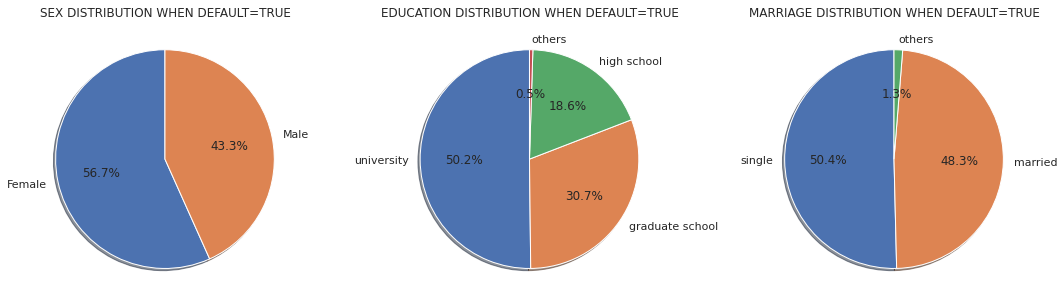

In [133]:
# Plot #4: Pie Charts for the SEX, EDUCATION, and MARRIAGE Features when Clients Defaulted on their payments. Pie charts illustrate the distribution of
# each of the mentioned features when the target variable is equal to Default.

sns.set(rc={'figure.figsize':(15,5)}, font_scale = 1)
sns.set_theme(style="white")
fig, axes=plt.subplots(1,3)

ed_list=['university', 'graduate school', 'high school', 'others']
mar_list=['single', 'married', 'others']
axes[0].pie(df[df['default payment next month']=='Yes']['SEX'].value_counts().tolist(), labels=df['SEX'].unique().tolist(), autopct='%1.1f%%',shadow=True, startangle=90)
axes[0].set_title('SEX DISTRIBUTION WHEN DEFAULT=TRUE')
axes[1].pie(df[df['default payment next month']=='Yes']['EDUCATION'].value_counts().tolist(), labels=ed_list,autopct='%1.1f%%', shadow=True, startangle=90)
axes[1].set_title('EDUCATION DISTRIBUTION WHEN DEFAULT=TRUE')
axes[2].pie(df[df['default payment next month']=='Yes']['MARRIAGE'].value_counts().tolist(), labels=mar_list,autopct='%1.1f%%', shadow=True, startangle=90)
axes[2].set_title('MARRIAGE DISTRIBUTION WHEN DEFAULT=TRUE')
plt.tight_layout()
plt.show()

From observing the different sex distribution pie chart, I can conclude that clients that are women have the highest likelihood to default on their bank statement as this group encompasses approximately 57% of the bank’s clientele that have missed the timeline to pay their bank statement. 

From observing the different educational level pie chart, I can conclude that clients with undergrad degrees have the highest likelihood to default on their bank bill statement as this group encompasses approximately 50% of the bank’s clientele that have missed paying their bank statement in the appropriate window of time. Next group that has a high likelihood to default on their bank bill statement are clients that have post grad degrees. This group encompasses approximately 30% of the bank’s clientele that have defaulted on their bank statement. Clients with high school degrees only encompasses approximately 19% of the bank’s clientele that have defaulted on their bank statement. Since the "others" category makes up for less than 1% of the total observations in the dataset, no useful insights can be drawn from this category. It appears as clients pursue education levels above high school, the likelihood of default increases. 

From observing the marital status pie chart, I can conclude that there is no significant difference between clients that are married or single as both groups have approximately the same default likelihood, with single clients having a slightly higher (by 2%) likelihood of defaulting than married clients.

### Plot #5: Histograms of Bank Client Payment History

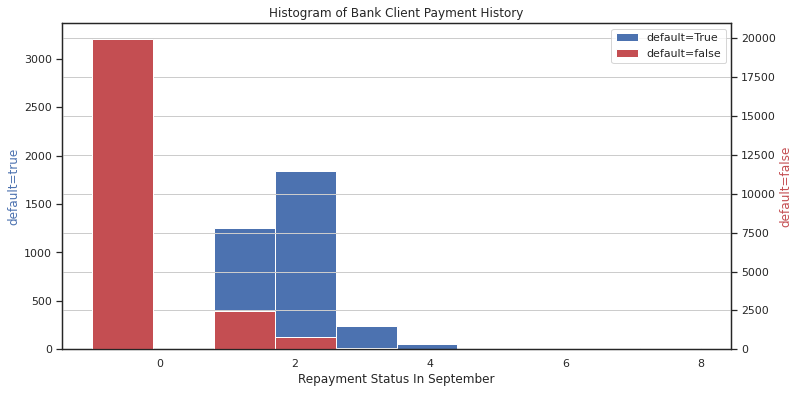

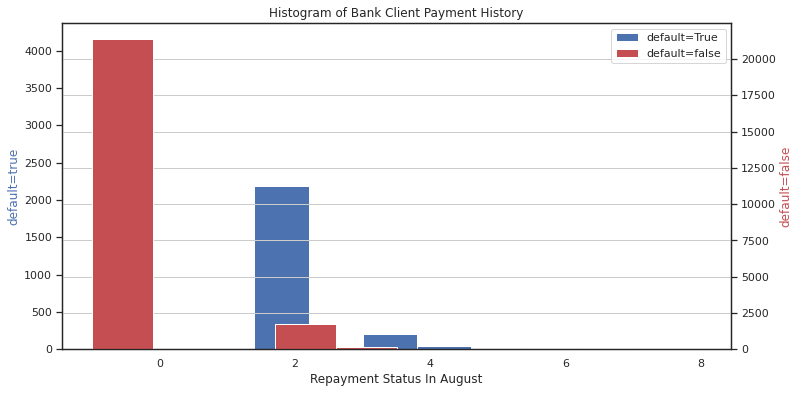

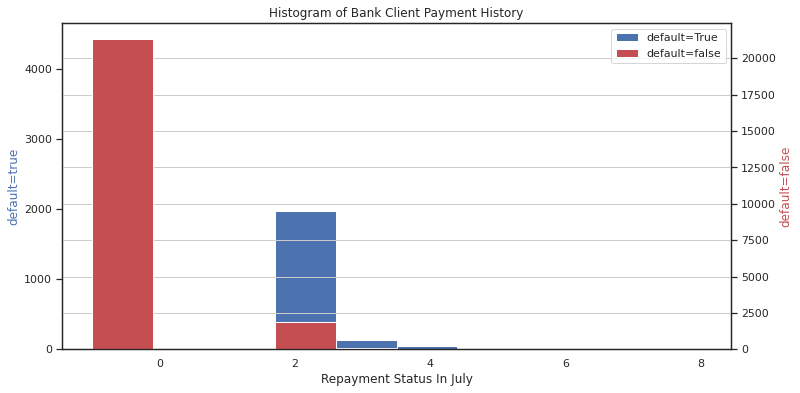

In [134]:
def double_axes_plot(feature, Title, X_label):
  fig1, ax1 = plt.subplots(figsize=(12,6)) ;
  ax1.hist(data=df[df['default payment next month']=="Yes"], x = feature ,label='default=True',color = 'b')
  ax1.set_xlabel(X_label)
  ax2 = ax1.twinx()

  ax2.hist(data=df[df['default payment next month']=="No"], x = feature ,label='default=false',color = 'r')

  handles1, labels1 = ax1.get_legend_handles_labels()
  handles2, labels2 = ax2.get_legend_handles_labels()

  ax2.set_ylabel('default=false',color='r')
  ax1.set_ylabel('default=true',color='b')
  plt.legend(handles1+handles2, labels1+labels2, loc='best')
  plt.title(Title)
  plt.grid(axis='both')
  plt.show()

# Plot #5: Histogram of clients history of Defualt/Not Default on their bank Statments
double_axes_plot('PAY_0','Histogram of Bank Client Payment History', "Repayment Status In September")
double_axes_plot('PAY_2','Histogram of Bank Client Payment History', "Repayment Status In August")
double_axes_plot('PAY_3','Histogram of Bank Client Payment History', "Repayment Status In July")

From the above histograms I can observe that clients that have a history of defaulting on their bank statements have a higher likelihood to default on their future bank statements. For example, the Pay_0 feature represents the client's September past payment behaviour. I can see clients that delayed paying their bank statements anywhere between 1 to 4 months compose the majority of the default category. Clients that paid their bank statement on time, compose the majority of the not default category.

### Plot 6: Bar Plot of the Target variable Distribution

In [135]:
# Seeing the distribution of the Target Variable 
df["default payment next month"].value_counts()

No     23364
Yes     6636
Name: default payment next month, dtype: int64

Text(0.5, 1.0, 'Bar Plot: Target Variable Distribution')

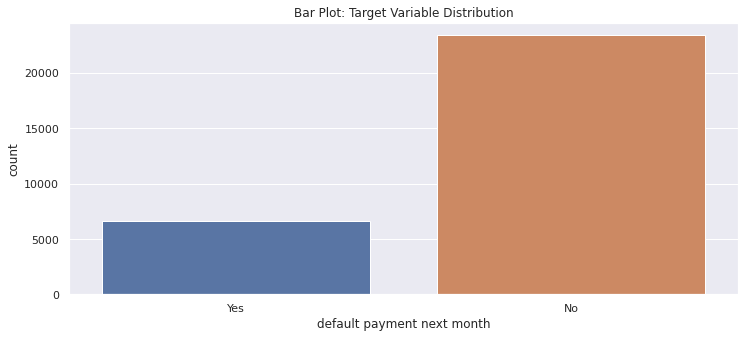

In [137]:
# Visualizing the distribution of the Target Varible in the dataset
sns.set(style="darkgrid")
plt.figure(figsize = (12,5))
sns.countplot(x='default payment next month',data=df)
plt.title("Bar Plot: Target Variable Distribution")

From the above Bar plot, I can see that the data is imbalance. I have 23364 of the "No" class (not default) and 6636 of class "Yes" (default). This corresponds to class No being 78% of the instances in the dataset whereas, class Yes will only correspond to 22% of the instances in the dataset. The imbalance dataset will result in my machine learning model to perform poorly. I will use SMOTE () function to synthetically oversample the minority class to obtain a balance dataset in the following section.

### Data Cleaning & Data Preprocessing:

First, I printed out any null values that exist in the dataset to later impute. Only the "MARRIAGE" feature contained null values. The "MARRIAGE" feature had 54 null values which when I compare it to the dataset having 30,000 instances, this value is considered to be very low. I imputed the 54 missing values in MARRIAGE with 'single' as it is the most-occurring entry in the dataset and has the highest probability of being the actual value. 

In [138]:
#Finding missing values in data 
df.isnull().sum()

LIMIT_BAL                      0
SEX                            0
EDUCATION                      0
MARRIAGE                      54
AGE                            0
PAY_0                          0
PAY_2                          0
PAY_3                          0
PAY_4                          0
PAY_5                          0
PAY_6                          0
BILL_AMT1                      0
BILL_AMT2                      0
BILL_AMT3                      0
BILL_AMT4                      0
BILL_AMT5                      0
BILL_AMT6                      0
PAY_AMT1                       0
PAY_AMT2                       0
PAY_AMT3                       0
PAY_AMT4                       0
PAY_AMT5                       0
PAY_AMT6                       0
default payment next month     0
dtype: int64

In [139]:
df['MARRIAGE'].value_counts(normalize=True)

single     0.533093
married    0.456121
others     0.010786
Name: MARRIAGE, dtype: float64

Imputing the 54 missing values in MARRIAGE with 'single' as it is the most-occurring entry in the dataset and has the highest probability of being the actual value.

In [140]:
df['MARRIAGE']=df['MARRIAGE'].fillna('single')
print('The null values in marriage are now',df['MARRIAGE'].isnull().sum()) 
# Self-check: seeing if any null values still exist in the Marriage Featuer

The null values in marriage are now 0


### Converting Categorical Varibles to Numerical Variables:

After the dataset was free of any null values, I converted the categorical variables to numerical variables. To work with machine learning models, I need to convert all categorical variables to numerical values by encoding them. Encoding will either be by one of the two following methods: 
1.	One-hot-encoding for Nominal Categorical variables (categorical variables that have no intrinsic order) 
2.	Label encoding for Ordinal Categorical variables (categorical variables that have an order like education Bachelor < Masters < PHD) 

Most of the columns in the dataset are already in the correct format (e.g., EDUCATION and PAY Features are in the correct label encoding) and so I just need to encode the "SEX" and "MARRIAGE" features. I considered the features "SEX" and "MARRIAGE" as Nominal Categorical variables (no intrinsic ordering). I used Panada’s get_dummies to one-hot-encode the "SEX" and "MARRIAGE" features.

In [141]:
# encoding the data
# I am considering the Features "SEX" and "MARRIAGE" as Nominal Categorical variables (no intrinsic ordering)

df_encoded = pd.get_dummies(df, columns = ['SEX','MARRIAGE'])
df_encoded

,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,SEX_Female,SEX_Male,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
0,20000,2,24,2,2,-1,-1,-1,-1,3913,...,0,0,0,0,Yes,1,0,1,0,0
1,120000,2,26,-1,2,-1,-1,-1,2,2682,...,1000,1000,0,2000,Yes,1,0,0,0,1
2,90000,2,34,-1,-1,-1,-1,-1,-1,29239,...,1000,1000,1000,5000,No,1,0,0,0,1
3,50000,2,37,-1,-1,-1,-1,-1,-1,46990,...,1200,1100,1069,1000,No,1,0,1,0,0
4,50000,2,57,-1,-1,-1,-1,-1,-1,8617,...,10000,9000,689,679,No,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,3,39,-1,-1,-1,-1,-1,-1,188948,...,5003,3047,5000,1000,No,0,1,1,0,0
29996,150000,3,43,-1,-1,-1,-1,-1,-1,1683,...,8998,129,0,0,No,0,1,0,0,1
29997,30000,2,37,4,3,2,-1,-1,-1,3565,...,22000,4200,2000,3100,Yes,0,1,0,0,1
29998,80000,3,41,1,-1,-1,-1,-1,-1,-1645,...,1178,1926,52964,1804,Yes,0,1,1,0,0


### Tackling the imbalanced data 

As mentioned previously, the dataset is imbalanced. The number of observations for default='Yes' are significantly lower. Thus, I used SMOTE, a popular oversampling technique. Oversampling is preferred to undersampling as the latter can lead to loss of meaningful information from the training data.

In [142]:
df_encoded['default payment next month'].value_counts()

No     23364
Yes     6636
Name: default payment next month, dtype: int64

In [143]:
# Balancing the data
# Using SMOTE() to oversample the minority class
oversample = SMOTE()
X, y = oversample.fit_resample(df_encoded.iloc[:,df_encoded.columns!='default payment next month'],df_encoded['default payment next month'])

### Splitting into train and test sets:


In [144]:
# Splitting into train and test (80% trian & 20% test):
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### I standardized my dataset by deploying StandardScaler(). Advantages of standardization is that it allows all features to contribute the same amount to the model, since all the features have the same scale and results in better performing model. This is especially important for k-nearest neighbors models as it classifies data according to distances.

In [145]:
#scaling data
#Fitting Standard scaler on train data
cols_train=X_train.columns 
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_train=pd.DataFrame(X_train, columns=cols_train)

#Transforming the test data with the scaler
cols_test=X_test.columns
X_test=scaler.transform(X_test)
X_test=pd.DataFrame(X_test,columns=cols_test)

### Feature Selection:

As Seen in Plot 1 (Correlation Heatmap of the dataset's Features), many features are highly correlated to one another. Features with high degrees of correlation will negatively impact the model by introducing more noise and only providing redundant information which will result in a poor performing model.


I defined a function that removes highly correlated features from the dataset to avoid increasing the model complexity by having correlated features.

In [146]:
# The following function selects highly correlated features and removes the 1st feature that is highly correlated with any other features

def corr_high_list(DataFrame, limit):
    col_corr = set()                       # All the names of correlated columns
    corr_matrix = DataFrame.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            
            if abs(corr_matrix.iloc[i, j]) > limit: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
                
    return col_corr

In [147]:
# Finding the Highly correlated features above the 0.75 threshold
High_Corr_Features = corr_high_list(X_train, 0.75)

In [148]:
# Printing the highly correlated features 
High_Corr_Features

{'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_5',
 'PAY_6'}

In [149]:
# Dropping the highly correlated features from the train dataset
X_train = X_train.drop(High_Corr_Features, axis =1)

#### Next, I used Recursive Feature Elimination (RFE) since this method is very efficient in disregarding features with the least importance. By removing nonessential features, I reduce the model's complexity and the noise that will be introduced to the model during training, resulting in an efficient classification model. Since at the time of coding this, I didn’t know what number of features would result in the best model, I looped over all the possible values (all 19 features) to find the optimal number of features. 

#### The below code is commented out since this code takes upwards of 30 minutes to execute, however, the results of the executed code is shown. 

In [ ]:
'''X_train_rf = X_train.copy()
y_train_rf = y_train.copy()

X_train_test, X_val_tree, y_train_test, y_val_tree = train_test_split(X_train_rf, y_train_rf, test_size= 20,random_state=40) 

#Iniating the model
model_rf = RandomForestClassifier(n_estimators = 100, random_state = 1)

# Use RFE to delete the feature with the least importance
# Here I am looping through all the features (19) and finding the the most optimal amount of features.
# This way I can be sure that the selected number of important features is the optimum.

Accuracy_list = []
for i in range (1, 19):
    rfe_tree = RFE(estimator = model_rf, n_features_to_select = i, step = 1) 
    model = rfe_tree.fit_transform(X_train_test, y_train_test)

    # Finding the accurarcy of the model 
    y_pred_rfe = rfe_tree.predict(X_val_tree)
    Accuracy = metrics.accuracy_score(y_pred_rfe, y_val_tree)
    Accuracy_list.append(Accuracy)

print ("Max accuracy is:" , max(Accuracy_list))
print ("The max accuracy corresponds to", (Accuracy_list.index(max(Accuracy_list)))+1,\
       "number of features")'''

Max accuracy is: 0.9
The max accuracy corresponds to 9 number of features


#### The below code sets the RFE to 9 features as it was determined to be the optimal amount from the line of codes before (see above code).

In [150]:
# Finding all the features using the founded optimize number of features from above

model_tree = RandomForestClassifier(n_estimators = 100, random_state = 1)

rfe_tree = RFE(estimator = model_tree, n_features_to_select = 9, step = 1) 
rfe_tree.fit_transform(X_train, y_train)

# Returns a boolean list with "TRUE" for the top 10 features 
rfe_tree.get_support()

# Finding the number of selected features:
Tree_Feature = [column for column in X_train.columns if column in X_train.columns[rfe_tree.get_support()]]

# Printing the list of the most important features 
Tree_Feature

['LIMIT_BAL',
 'AGE',
 'PAY_0',
 'PAY_2',
 'BILL_AMT1',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4']

Please note that the Machine Learning models in the following section will be trained and tested only on the features selected after performing RFE (Tree_Feature).

In [151]:
#Storing these features in a list for further use:
Tree_Feature=['LIMIT_BAL','AGE','PAY_0','PAY_2','BILL_AMT1','PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4']

# The above features are the features which I will use in my Machine Learning models 

### Implementing 2 machine learning models

#### Model Selection

The two machine learning models I have selected to implement on my dataset is: 
1.	Logistic Regression 
2.	K-nearest neighbor classifiers (KNN)

I choose the Logistic Regression model for the following reasons: 

- Logistic Regression is very efficient when working with datasets that contain features that are linearly separable. 
- By implementing a Logistic Regression model, I can better grasp individual feature importance by inspecting the model's weights/coefficients. This information would be extremely insightful for my case, as I would have a better understanding of what features lead to clients defaulting on their feature payments and I can inform the bank to be wary of these features. 
- I can update my Logistic Regression Model easily with the presence of new information. Many other classification models don’t have an easy update feature such as Decision Tree models. This feature proves to be very helpful when dealing with transactional data, as banks are constantly gathering new information from their clients. By using logistic Regression, I am allowed to update my existing model with new information to better predict clients probability to default. 
- Another advantage of Logistic Regression model is that it provides calibrated probabilities with the classification results. Knowing the probabilities of the predictions allows users to know which training observations are better suited to solve the formulated problem. 

I choose the KNN model for the following reasons: 

- KNN can learn non-linear decision boundaries as this machine learning model can develop very flexible decision boundaries with the tuning of the hyperparameter K. 
- Since the KNN model is an instance-based learning algorithm, it has no exact training step, and all the work is completed when the model is making the real-time predictions. This feature leads the KNN algorithm to be much more efficient than counterpart classifying models. Since there is no training step, I can add new information seamlessly to the dataset and the prediction would be automatically re-adjusted without needing to retrain the model. Essentially, KNN constantly evolves with the introduction of new data. This feature is very useful for transactional data as banks are collecting new transactional information from their clients on a daily basis. By implementing a KNN model, I can easily update my model with the new transactional data and help the bank better predict clients that will have higher probability of defaulting. 
- Another advantage of KNN is that it only contains two hyper- parameters (the K and the distance parameter). Since the model is not complex in nature, I can easily implement and tune the model to have an efficient classifying model.


### Performance Metrics:

Since my problem statement is to identify the customers likely to default, I need the lowest false negatives possible (FN). A high FN means that the bank is misclassifying customers that would default and this is not acceptable since the bank would lose much of their capital that could otherwise go to a loyal customer. In addition, the recall (TP/TP+FN) should be as high as possible, because the ideal case would be that the bank classifies all clients that would default correctly (True Positive - TP) while having the lowest possible misclassification of clients that default (FN).     

F1 score is also a good performance metric to measure when working with classification model. F1 score combines both Precision and Recall into one performance metric that would give me an idea on how well my model is performing overall.     

I also measured the accuracy of my model to understand if my model is under/over fitting the data and how well is my model performing overall.   

To illustrate each model’s confusion matrix, I made a customized confusion matrix  function shown below:

In [152]:
#Building a customised confusion matrix for evaluation:

def model_Evaluate(model,X_test):
  # Predict values for Test dataset
  y_pred = model.predict(X_test)
  # Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))
  # Compute and plot the Confusion matrix
  plt.figure(figsize=(6,6))
  cf = confusion_matrix(y_test, y_pred)
  categories = ['Default=False','Default=True']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_counts = ['{0:0.0f}'.format(value) for value in cf.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in cf.flatten() / np.sum(cf)]

  labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf, annot = labels,cmap = 'Blues',fmt = '',xticklabels = categories, yticklabels = categories)
  
  plt.xlabel("Predicted values")
  plt.ylabel("Actual values" )
  plt.title ("Confusion Matrix")

## Models implementation

#### Implementing the Logistic Regression model:

              precision    recall  f1-score   support

          No       0.69      0.85      0.77      4656
         Yes       0.81      0.63      0.71      4690

    accuracy                           0.74      9346
   macro avg       0.75      0.74      0.74      9346
weighted avg       0.75      0.74      0.74      9346



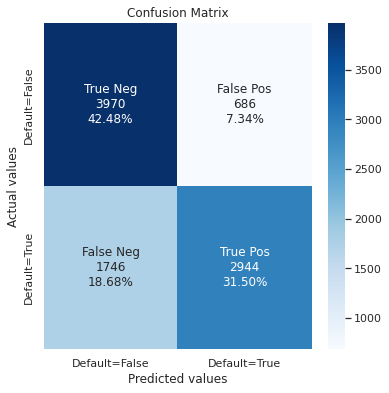

In [153]:
#Logistic Regression:
#define the model
logistic_model=LogisticRegression(C=0.0001,solver='lbfgs') 

#fit the model on train
logistic_model.fit(X_train[Tree_Feature],y_train)

#evaluate the model on test
model_Evaluate(logistic_model,X_test[Tree_Feature])

In [154]:
#prediction on test
test_pred_log=logistic_model.predict(X_test[Tree_Feature])

#prediction on train
train_pred_log=logistic_model.predict(X_train[Tree_Feature])

#prediction probability on test
test_prob_log=logistic_model.predict_proba(X_test[Tree_Feature])

#printing the metrics
print('For Logistic model','\nThe test accuracy:', round(accuracy_score(y_test,test_pred_log)*100),'%',\
      '\nThe train accuracy:', round(accuracy_score(y_train,train_pred_log)*100),'%',\
      '\nprecision score:',round(precision_score(y_test,test_pred_log,pos_label='Yes'),3),\
      '\nrecall score:',round(recall_score(y_test,test_pred_log,pos_label='Yes'),3),\
      '\nf1 score:',round(f1_score(y_test,test_pred_log,pos_label='Yes'),3))
print('AUC score is',round(roc_auc_score(y_test,test_prob_log[:,1]),3))

For Logistic model 
The test accuracy: 74 % 
The train accuracy: 73 % 
precision score: 0.811 
recall score: 0.628 
f1 score: 0.708
AUC score is 0.788


The false negative rate is defined as the ratio of false negatives to the sum of false negatives and true positives. By inspecting the confusion matrix, the false negative rate is high at 19% meaning the model fails to identify 19% of the total customer who will actually default. The model's false positive rate is lower meaning it is less likely to wrongly classify the people not likely to default.

The model has a train accuracy of 73% and a test accuracy of 74%. This indicates the model has nor overfit or underfit the data and learn from the train data adequately. 

A possible solution to increase the overall accuracy and performance of the model is to find more variables (possibly new features) that have a high correlation with target but have a low correlation with one another and don’t have similar variances.


#### Implementing the KNN model:

              precision    recall  f1-score   support

          No       0.77      0.76      0.76      4656
         Yes       0.77      0.77      0.77      4690

    accuracy                           0.77      9346
   macro avg       0.77      0.77      0.77      9346
weighted avg       0.77      0.77      0.77      9346



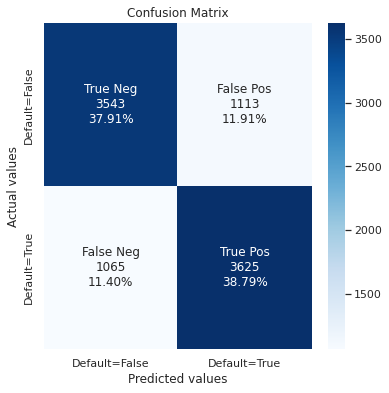

In [155]:
#defining the knn model
knn = KNeighborsClassifier(n_neighbors=5)

#fitting the model on train
knn.fit(X_train[Tree_Feature],y_train)

#evaluate the model on test
model_Evaluate(knn,X_test[Tree_Feature])

In [156]:
#test prediction
test_pred_knn=knn.predict(X_test[Tree_Feature])

#train prediction
train_pred_knn=knn.predict(X_train[Tree_Feature])

#prediction probability on test
test_prob_knn=knn.predict_proba(X_test[Tree_Feature])

#printing the metrics
print('For KNN model','\nThe test accuracy:', round(accuracy_score(y_test,test_pred_knn)*100),'%',\
      '\nThe train accuracy:', round(accuracy_score(y_train,train_pred_knn)*100),'%',\
      '\nprecision score:',round(precision_score(y_test,test_pred_knn,pos_label='Yes'),3),\
      '\nrecall score:',round(recall_score(y_test,test_pred_knn,pos_label='Yes'),3),\
      '\nf1 score:',round(f1_score(y_test,test_pred_knn,pos_label='Yes'),3))
print('AUC score is',round(roc_auc_score(y_test,test_prob_knn[:,1]),3))

For KNN model 
The test accuracy: 77 % 
The train accuracy: 85 % 
precision score: 0.765 
recall score: 0.773 
f1 score: 0.769
AUC score is 0.846


For the KNN model, the false negative rate is much lower at 11%. Its recall (the most important metric in my case) is also much higher than logistic model. Hence, the model is better performing out of the two.

The model has a train accuracy of 85% and a test accuracy of 77%. This indicates the model has nor overfit or underfit the data and learn from the train data adequately. 

A possible solution to increase the overall accuracy and performance of the model is to find more variables (possibly new features) that have a high correlation with target but have a low correlation with one another and don’t have similar variances.


#### **Hyperparameter tuning for the 2 models:**

#### Hyperparameter Tuning The Logistic Regression Model:

I have used a 5-fold cross-validation to tune the models

In [157]:
#Defining the model
logreg = LogisticRegression(random_state=1)

#Defining hyperparamters for tuning
grid={"C":[0.01,0.1, 1,5,10,50], "solver":['newton-cg', 'lbfgs', 'saga'],'penalty':['l1','l2','elasticnet']}

#grid seach for best hyperparameters
logreg_tuned = GridSearchCV(logreg,grid,cv=5)
logreg_tuned.fit(X_train[Tree_Feature],y_train)

print("tuned hyperparameters :(best parameters) ",logreg_tuned.best_params_)
print("accuracy :",logreg_tuned.best_score_)

tuned hyperparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
accuracy : 0.7430045898558325


In [158]:
#Fitting the best model on train after tuning
best_logistic_model = LogisticRegression(random_state=1, C=1, solver='newton-cg',penalty='l2')
best_logistic_model.fit(X_train[Tree_Feature], y_train)

#prediction on test
test_pred_log=best_logistic_model.predict(X_test[Tree_Feature])

#prediction on train
train_pred_log=best_logistic_model.predict(X_train[Tree_Feature])

#prediction probability on test
test_prob_log=best_logistic_model.predict_proba(X_test[Tree_Feature])

#printing the metrics
print('For best Logistic model','\nThe test accuracy:', round(accuracy_score(y_test,test_pred_log)*100),'%',\
      '\nThe train accuracy:', round(accuracy_score(y_train,train_pred_log)*100),'%',\
      '\nprecision score:',round(precision_score(y_test,test_pred_log,pos_label='Yes'),3),\
      '\nrecall score:',round(recall_score(y_test,test_pred_log,pos_label='Yes'),3),\
      '\nf1 score:',round(f1_score(y_test,test_pred_log,pos_label='Yes'),3))
print('AUC score is',round(roc_auc_score(y_test,test_prob_log[:,1]),3))

For best Logistic model 
The test accuracy: 75 % 
The train accuracy: 74 % 
precision score: 0.818 
recall score: 0.652 
f1 score: 0.726
AUC score is 0.79


After Hyper-parameter tuning, I can see that all performance metrics have increased. This makes sense as GridSearchCV iterates over all the given hyper parameters and finds the most optimal combination of parameters for my model

#### Hyperparameter Tuning The KNN Model:

In [159]:
#Defining the model
kneighbors = KNeighborsClassifier()

#Defining hyperparamters for tuning
grid={"n_neighbors":[5,10], 'p':[1,2],'leaf_size':[30,40]}

#grid seach for best hyperparameters
knn_tuned = GridSearchCV(kneighbors,grid,cv=2)
knn_tuned.fit(X_train[Tree_Feature],y_train)

print("tuned hyperparameters :(best parameters) ",knn_tuned.best_params_)
print("accuracy :",knn_tuned.best_score_)

tuned hyperparameters :(best parameters)  {'leaf_size': 30, 'n_neighbors': 10, 'p': 1}
accuracy : 0.7677491840992992


In [160]:
#Fitting the best model on train after tuning
best_knn_model =KNeighborsClassifier(n_neighbors=10,p=1, leaf_size=40)
best_knn_model.fit(X_train[Tree_Feature], y_train)

#prediction on test
test_pred_knn=best_knn_model.predict(X_test[Tree_Feature])

#prediction on train
train_pred_knn=best_knn_model.predict(X_train[Tree_Feature])

#prediction probability on test
test_prob_knn=best_knn_model.predict_proba(X_test[Tree_Feature])

#printing the metrics
print('For best knn model','\nThe test accuracy:', round(accuracy_score(y_test,test_pred_knn)*100),'%',\
      '\nThe train accuracy:', round(accuracy_score(y_train,train_pred_knn)*100),'%',\
      '\nprecision score:',round(precision_score(y_test,test_pred_knn,pos_label='Yes'),3),\
      '\nrecall score:',round(recall_score(y_test,test_pred_knn,pos_label='Yes'),3),\
      '\nf1 score:',round(f1_score(y_test,test_pred_knn,pos_label='Yes'),3))
print('AUC score is',round(roc_auc_score(y_test,test_prob_knn[:,1]),3))

For best knn model 
The test accuracy: 78 % 
The train accuracy: 82 % 
precision score: 0.816 
recall score: 0.723 
f1 score: 0.767
AUC score is 0.86


After Hyper-parameter tuning, I can see that the overall accuracy of the model has increased. This makes sense as GridSearchCV iterates over all the given hyper parameters and finds the most optimal combination of parameters for my model. 